In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# long-term goals

• represent networks/graphs in python
• create interesting (realistic) networks
• describe some of the important/interesting parts of networks
• a model for processes on networks

edge
node/vertex
loop (node is connected to itself
cycle 

assign numbers to nodes–edge is two numbers

In [2]:
a = {1:[2,3], 0:[1,4]}
a

{1: [2, 3], 0: [1, 4]}

a graph of 7 nodes: 
0: [1, 2]
1: [0]
2: [0]
3: [4]
4: [3, 5]
5: [4]
7: []

Nodes: [0, 1, 2, 3, 4, 5, 7]
edges: [(0, 1), (0, 2), (3, 4), (4, 5)]


/Users/audreyrussell/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


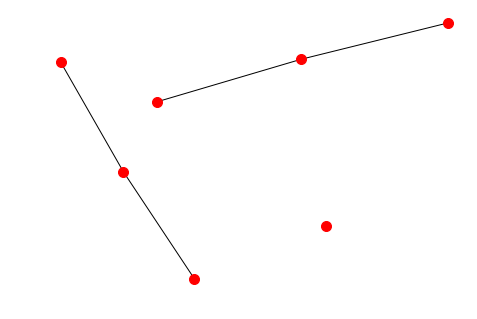

In [3]:
class Graph():
    def __init__(self):
       # self.edges = [] #a list of tuples
     #   self.nodes = []
        self.gdict = {}
        
    
    def add_node(self, node):
        """if node not in dictionary, add it!"""
        if node not in self.gdict:
            self.gdict[node] = []
    
    def add_edge(self, node1, node2):
        self.add_node(node1)
        self.add_node(node2)
        if node2 not in self.gdict[node1]:
            self.gdict[node1].append(node2)
        if node1 not in self.gdict[node2]:
            self.gdict[node2].append(node1)
            
    def nodes(self):
        """returns a list of nodes"""
        return list(self.gdict.keys())
    
    def edges(self):
        """returns a list of edges"""
        out = []
        for node,links in self.gdict.items():
            for link in links:
                if node < link:
                    out.append((node,link))
        return out
            
    def __str__(self):
        out = "a graph of " + str(len(self.gdict)) + " nodes: \n"
        for node in self.gdict:
            out += str(node) + ": " + str(self.gdict[node]) + "\n"
        return out
    
    def plot(self):
        g_nx = nx.Graph()
        g_nx.add_nodes_from(self.nodes())
        g_nx.add_edges_from(self.edges())
        nx.draw_kamada_kawai(g_nx, node_size = 100)

#test
g = Graph()
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_node(7)
print(g)
print("Nodes:" , g.nodes())
print("edges:", g.edges())
g.plot()

a graph of 50 nodes: 
0: [17, 43, 9, 1]
1: [10, 40, 24, 28, 0, 45]
2: [26, 49, 19]
3: [40, 8, 34, 26, 15]
4: [46]
5: [28, 40]
6: [41, 30]
7: []
8: [3, 34, 15, 45, 33]
9: [49, 0]
10: [1]
11: []
12: [13, 20]
13: [12]
14: [22]
15: [8, 43, 25, 3]
16: [48, 38]
17: [0, 40]
18: [35]
19: [39, 31, 33, 2]
20: [12, 32]
21: []
22: [14]
23: [43, 37]
24: [1]
25: [15]
26: [2, 45, 3, 31]
27: [33]
28: [5, 1]
29: [30]
30: [6, 29]
31: [19, 26]
32: [20]
33: [27, 19, 8]
34: [3, 8]
35: [18]
36: [46]
37: [23]
38: [44, 16]
39: [19]
40: [3, 1, 44, 48, 5, 17]
41: [6]
42: []
43: [23, 0, 15]
44: [40, 38]
45: [26, 8, 1]
46: [4, 36]
47: []
48: [40, 16]
49: [9, 2]



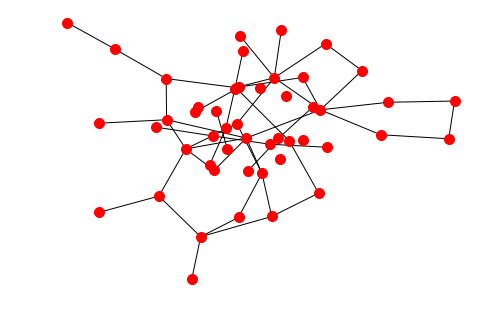

In [5]:
N_NODES = 50
N_EDGES = N_NODES

g = Graph()
for i in range(N_NODES):
    g.add_node(i)
edges = []
while len(edges) < N_EDGES:
    n1 = np.random.randint(low = 0, high = N_NODES)
    n2 = np.random.randint(low = 0, high = N_NODES)
    if n2 < n1:
        n1,n2 = n2,n1
    
    if (n1,n2) not in edges and n1 != n2:
        g.add_edge(n1,n2)
        edges.append((n1,n2))
    
print(g)
g.plot()

[4, 6, 3, 5, 1, 2, 2, 0, 5, 2, 1, 0, 2, 1, 1, 4, 2, 2, 1, 4, 2, 0, 1, 2, 1, 1, 4, 1, 2, 1, 2, 2, 1, 3, 2, 1, 1, 1, 2, 1, 6, 1, 0, 3, 2, 3, 2, 0, 2, 2]
[ 5. 16. 17.  4.  4.  2.  2.]


Text(0, 0.5, 'frequency')

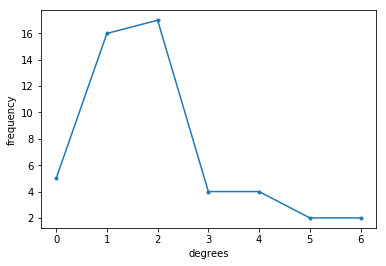

In [6]:
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))
    
print(degrees)
hist = np.zeros(max(degrees) + 1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist, ".-");
plt.xlabel("degrees")
plt.ylabel("frequency")

different way to create random network:
add nodes one by one
as you add it, choose a node to connect to randomly
once the network is ready, compare its degrees distribution to that of the "truly random" network

# homework
make extra nodes and add to the network (via random selection)
add them to the graph

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.  1.]


Text(0, 0.5, 'frequency')

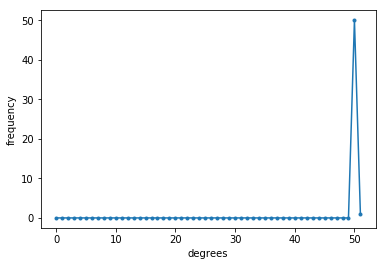

In [15]:
N_STEPS = 10
for s in range(N_STEPS):
    for i in range(N_NODES):
        g.add_node(i)
        for j in range(N_NODES):
            if j != i:
                g.add_edge(i, j) #it should be between i and j but this doesn't work!
                
                
#i think histogram stays the same? here she is
degrees = []
for node,links in g.gdict.items():
    degrees.append(len(links))
    
print(degrees)
hist = np.zeros(max(degrees) + 1)
for degree in degrees:
    hist[degree] += 1
print(hist)

plt.plot(hist, ".-");
plt.xlabel("degrees")
plt.ylabel("frequency")

Not sure what happened here! I think I'm able to add extra nodes–the issue comes with forming an edge between new nodes and existing ones. Each node is only forming an edge with the new node and that is not okay!  